---

# <center>Processamento Básico de Imagens</center>

---

## 1. CONFIGURAÇÕES DE AMBIENTE

### 1.1 Instalação de Pacotes

In [1]:
# watermark: Exibe informações como versões de pacotes e hardware. 
# !pip install -q -U watermark

# opencv-python: Usada em processamento de imagens e visão computacional.
# !pip install -q -U opencv-python

# opencv-contrib-python: Inclui funcionalidades extras e módulos experimentais para o OpenCV.
# !pip install -q -U opencv-contrib-python

### 1.2 Carga de Pacotes

In [2]:
# Visão Computacional
import cv2

# Ambiente de desenvolvimento
import warnings

# Visualização
import matplotlib
from PIL import Image
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from IPython.display import display

# Ignorando avisos desnecessários
warnings.filterwarnings("ignore")

### 1.3 Configurações da Máquina

In [3]:
%reload_ext watermark
%watermark -v -m

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-92-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



## 2. CARREGANDO E VISUALIZANDO IMAGEM

### 2.1 Carregando Imagem

In [4]:
img_original = imageio.imread("imagens/gato.jpeg")

### 2.2 Visualizando Imagem

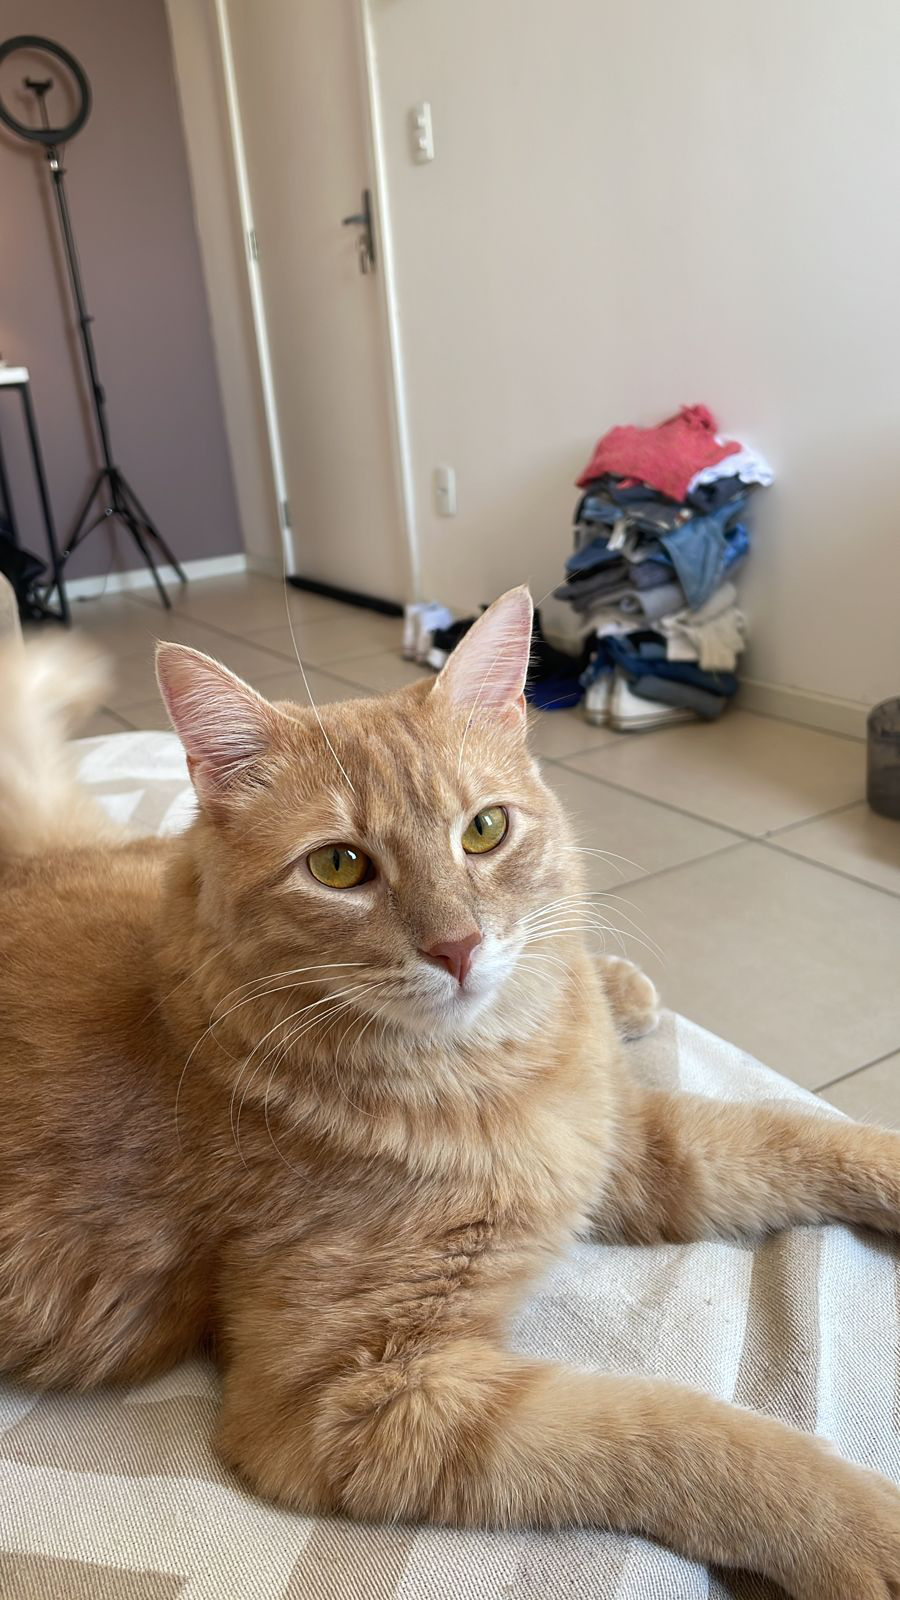

In [5]:
display(Image.open("imagens/gato.jpeg"))

## 3. FILTRO GAUSSIANBLUE

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">O Filtro GaussianBlur é uma técnica crucial no processamento de imagens, amplamente utilizada para suavizar imagens através da biblioteca OpenCV em Python. Esse filtro aplica um desfoque gaussiano, caracterizado pela sua capacidade de reduzir o ruído e detalhes menores das imagens, utilizando um kernel que segue uma distribuição gaussiana.</p>

### 3.1 Principais Razões para Usar o GaussianBlur

1. <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Suavização de Imagens</strong>: O filtro ajuda a suavizar a textura da imagem, tornando-a visualmente mais agradável e menos distraída por detalhes menores ou ruídos.</p>
2. <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Redução de Ruído</strong>: É eficaz na eliminação de ruídos, tornando a imagem mais limpa e facilitando a identificação de padrões ou objetos.</p>
3. <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Preparação para Análise de Imagem</strong>: Serve como uma etapa preliminar importante para simplificar a imagem, melhorando a eficácia de algoritmos subsequentes de detecção de bordas ou reconhecimento de padrões.</p>
    
4. <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Efeitos Visuais</strong>: Pode ser empregado para criar um efeito estético de suavidade, ideal para fotografias ou efeitos de "sonho" em imagens.</p>

### 3.2 Parâmetros Principais

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Tamanho do Kernel</strong>: Um kernel maior intensifica o desfoque, afetando a área sobre a qual o filtro é aplicado.</p>
- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Desvio Padrão</strong>: Controla a dispersão do desfoque. Um valor maior significa que pixels mais distantes influenciam no resultado do desfoque.</p>

In [6]:
# Aplicando o método de suavização GaussianBlur
img_gauss = cv2.GaussianBlur(img_original, (111, 111), 0)

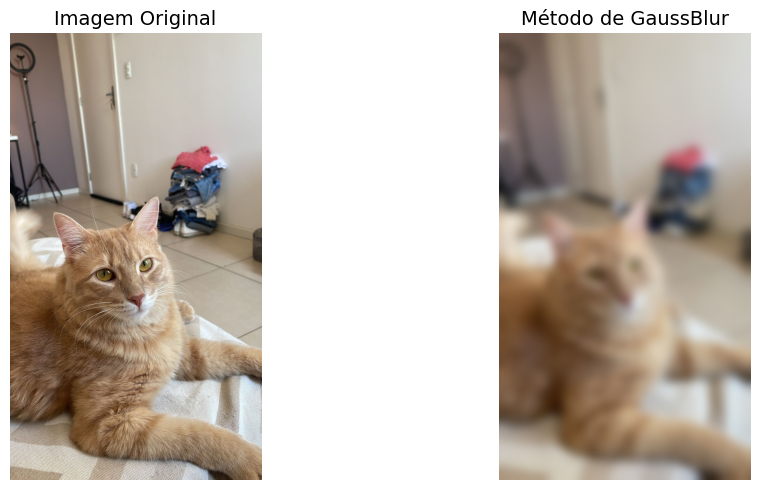

In [7]:
# Visualizando imagem pós filtro
def plot_results(img_original, method, title_method="Método de GaussBlur", src="GaussBlur"):
    """
    Função para plotar a imagem original e o resultado da aplicação do método de suavização GaussBlur.

    Parâmetros:
    - img_original: Imagem original em formato compatível com matplotlib (geralmente um array numpy).
    - bordas: Imagem resultante da aplicação do método de Canny.
    - title_original: Título a ser exibido sobre a imagem original.
    - title_canny: Título a ser exibido sobre a imagem resultante da aplicação do método de GaussBlur.
    """

    # Configura o tamanho e layout da figura
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Ajusta espaço entre as imagens
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    # Plotagem da imagem original
    ax[0].imshow(img_original)
    ax[0].set_title("Imagem Original", fontsize=14)
    ax[0].axis("off")  # Remove os eixos

    # Plotagem da imagem com bordas detectadas
    ax[1].imshow(method)
    ax[1].set_title(title_method, fontsize=14)
    ax[1].axis("off")  # Remove os eixos

    # Melhora a distribuição dos plots
    plt.tight_layout()

    # Exibe a figura
    plt.savefig(f'imagens/{src}.jpeg', dpi=300, format='jpg', bbox_inches='tight')
    plt.show()
plot_results(img_original, img_gauss)

## 4. ROTAÇÃO DE IMAGENS

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">A rotação de imagens é um procedimento fundamental no campo do processamento de imagens, permitindo a alteração da orientação de uma imagem. Essa técnica encontra aplicação em uma variedade de contextos, desde correções simples de orientação de fotografias até em sistemas avançados de visão computacional, onde é necessário normalizar a orientação de objetos visualizados sob diferentes ângulos.</p>

### 4.1 Implementação no OpenCV

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">No OpenCV, a implementação da rotação de uma imagem é realizada através de uma sequência de etapas que envolvem a criação de uma matriz de rotação e a aplicação dessa matriz à imagem original. Os passos a seguir descrevem esse processo:</p>

1. <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Definindo o Centro da Rotação</strong>: Primeiramente, identifica-se o centro da imagem, que atuará como o ponto de pivô para a rotação. Este é tipicamente calculado como sendo a metade das dimensões de largura e altura da imagem.</p>

2. <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Geração da Matriz de Rotação</strong>: Utiliza-se a função `cv2.getRotationMatrix2D` para gerar a matriz de rotação. Essa função requer o centro da rotação, o ângulo pelo qual a imagem será rotacionada (em graus) e o fator de escala, que permite alterar o tamanho da imagem durante o processo de rotação.</p>

3. <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Aplicação da Rotação</strong>: A imagem é rotacionada aplicando a matriz de rotação através da função `cv2.warpAffine`. Este passo ajusta os pixels da imagem original para suas novas posições, conforme especificado pela matriz de rotação, resultando na imagem rotacionada.</p>

### 4.2 Considerações Importantes

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Qualidade da Imagem</strong>: A rotação pode causar distorções, particularmente em ângulos que não são múltiplos de 90 graus. Para mitigar perdas de qualidade, algoritmos de interpolação são empregados, estimando os valores dos pixels nas novas localizações.</p>

- <p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;"><strong>Dimensões da Imagem</strong>: A imagem resultante da rotação pode exceder as dimensões originais da imagem, dependendo do ângulo escolhido. É crucial gerenciar como essas situações são tratadas, adaptando o tamanho da imagem ou preenchendo áreas vazias conforme necessário.</p>

### 4.3 Rotacionando Imagem

In [8]:
# Obtendo a matriz de rotação
altura, largura = img_original.shape[:2]
centro          = ((largura / 2), (altura / 2))
matriz_rotacao  = cv2.getRotationMatrix2D(centro, 45, 1)

# Aplicando a rotação na imagem original
img_rotacionada = cv2.warpAffine(img_original, matriz_rotacao, (largura, altura))

### 4.4 Visualizando Imagem Rotacionada

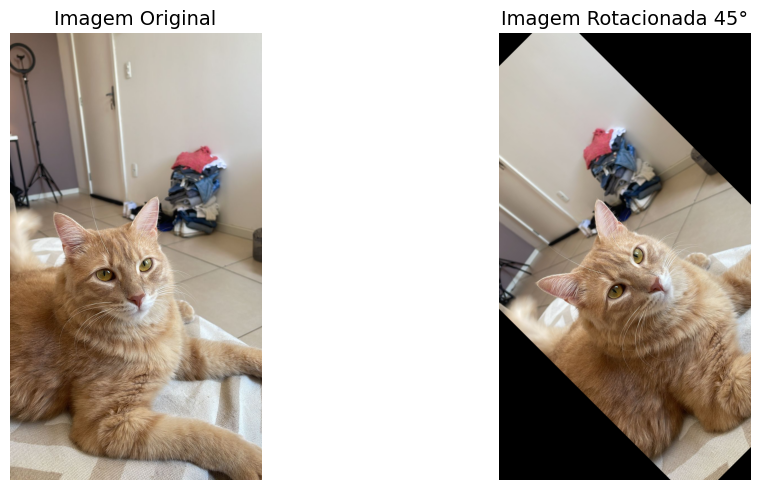

In [9]:
plot_results(img_original, img_rotacionada, title_method="Imagem Rotacionada 45°", src="rotacionada")

## 5. CONCLUSÃO

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">O Filtro GaussianBlur provou ser uma ferramenta essencial para a suavização de imagens, eficaz na redução de ruído e na preparação de imagens para processos subsequentes, como a detecção de bordas ou o reconhecimento de padrões. Através de sua aplicação, aprendemos como parâmetros como o tamanho do kernel e o desvio padrão podem influenciar o resultado do desfoque, permitindo um controle preciso sobre o efeito visual final.</p>

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">Por outro lado, a técnica de rotação de imagens nos permitiu entender como a manipulação geométrica das imagens pode ser realizada. Ajustando a orientação de imagens através de rotações, vimos como é possível normalizar a apresentação de dados visuais, uma etapa crucial para muitas aplicações práticas em visão computacional. A implementação detalhada nos proporcionou insights sobre como os cálculos matemáticos são transformados em transformações visuais, destacando a importância de considerações como a qualidade da imagem e as dimensões da imagem após a rotação.</p>

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">Essas técnicas, embora básicas, são pilares no campo do processamento de imagens e oferecem uma fundação sólida sobre a qual técnicas mais avançadas podem ser construídas. A aplicação prática desses métodos em projetos reais não apenas aprimora nossa compreensão teórica, mas também abre portas para inovação e aplicações criativas em diversos domínios, desde o desenvolvimento de aplicativos até a pesquisa científica.</p>